In [ ]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

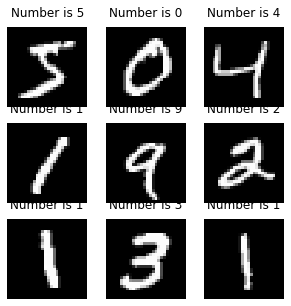

In [ ]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(3,3,figsize=(5,5))
plt.gray()
for i,ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number is {}'.format(y_train[i]))
fig.show()

Number is : 5


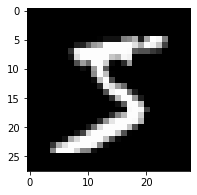

Number is : 0


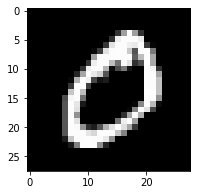

Number is : 4


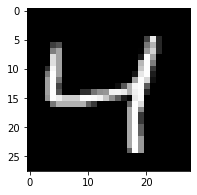

Number is : 1


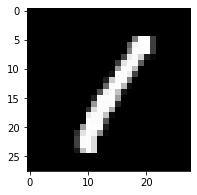

In [ ]:
for i in range(0,4):
  plt.figure(figsize=(3,3))
  plt.imshow(x_train[i])
  print('Number is :',y_train[i])
  plt.show()

In [ ]:
print(x_train.ndim)

3


In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape((x_test.shape[0],28,28,1))
input_shape=(28,28,1)
print(x_train.ndim)

4


In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train:',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test 10000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2093 - accuracy: 0.9376
Epoch 2/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0836 - accuracy: 0.9744
Epoch 3/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0569 - accuracy: 0.9824


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0559 - accuracy: 0.9819


[0.055940892547369, 0.9818999767303467]

In [ ]:
p=model.predict(x_test)

In [ ]:
print(p[0])

[8.2509018e-08 5.1371423e-08 9.0818285e-06 1.4922370e-05 9.1078443e-09
 7.6381028e-08 1.2185623e-11 9.9997306e-01 1.2969757e-06 1.3908282e-06]
